In [79]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [4]:
#fifa 19 players data
game_19=pd.read_csv("players_19.csv")
game_19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [5]:
#fifa 20 players data
game_20=pd.read_csv("players_20.csv")
game_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
print(list(game_19.columns))
print(list(game_20.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [7]:
print(game_19.shape)
print(game_20.shape)

(17770, 104)
(18278, 104)


the results above just show that there were more players added to the fifa 20 database compared to fifa 19 data.

In [8]:
#dropping columns we do not need
throw_away=['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [9]:
game_19=game_19.drop(throw_away,axis=1)
game_20=game_20.drop(throw_away,axis=1)

In [10]:
print(game_19[['short_name','player_positions']])
print(game_20[['short_name','player_positions']])

              short_name player_positions
0      Cristiano Ronaldo           ST, LW
1               L. Messi       CF, RW, ST
2              Neymar Jr          LW, CAM
3                 De Gea               GK
4           K. De Bruyne          CAM, CM
...                  ...              ...
17765        P. Phillips          CM, CDM
17766         A. Kaltner               ST
17767        Ma Junliang               CM
17768          C. Ehlich               RB
17769           E. Tweed               CM

[17770 rows x 2 columns]
              short_name player_positions
0               L. Messi       RW, CF, ST
1      Cristiano Ronaldo           ST, LW
2              Neymar Jr          LW, CAM
3               J. Oblak               GK
4              E. Hazard           LW, CF
...                  ...              ...
18273         Shao Shuai               CB
18274       Xiao Mingjie               CB
18275          Zhang Wei               CM
18276       Wang Haijian               CM
18277   

C:\Users\devar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


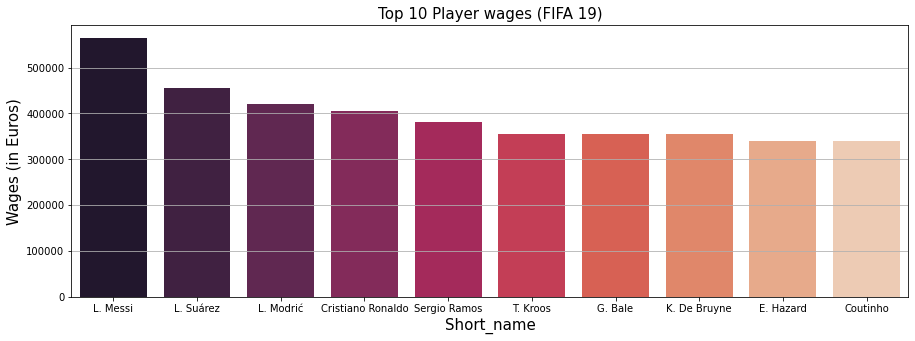

In [25]:
game_19_high_wage = game_19.sort_values(by=['wage_eur'], ascending=False)
plt.figure(figsize = (15, 5))
plt.grid()
plot1=sns.barplot(game_19_high_wage['short_name'].head(10), game_19_high_wage['wage_eur'].head(10), palette="rocket")
plot1.set_xlabel("Short_name",fontsize=15)
plot1.set_ylabel("Wages (in Euros)",fontsize=15)
plot1.set_title("Top 10 Player wages (FIFA 19)",fontsize=15);

C:\Users\devar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


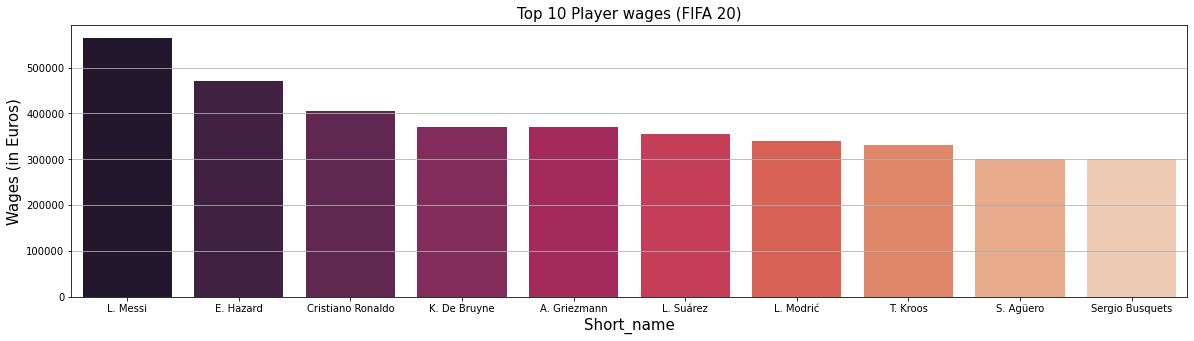

In [26]:
game_20_high_wage = game_20.sort_values(by=['wage_eur'], ascending=False)
plt.figure(figsize = (20, 5))
plt.grid()
plot2=sns.barplot(game_20_high_wage['short_name'].head(10), game_20_high_wage['wage_eur'].head(10), palette="rocket")
plot2.set_xlabel("Short_name",fontsize=15)
plot2.set_ylabel("Wages (in Euros)",fontsize=15)
plot2.set_title("Top 10 Player wages (FIFA 20)",fontsize=15);

In [28]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [29]:
print(game_19[columns].head())
print(game_20[columns].head())

     ls    st    rs    lw    lf    cf    rf    rw   lam   cam  ...   lwb  \
0  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  ...  65+3   
1  88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  ...  63+2   
2  84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  ...  65+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4  82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  ...  77+3   

    ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
1  61+2  61+2  61+2  63+2  58+2  47+2  47+2  47+2  58+2  
2  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3  

[5 rows x 26 columns]
     ls    st    rs    lw    lf    cf    rf    rw   lam   cam  ...   lwb  \
0  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  ...  68+2   
1  91+3  91+3  91+3 

In [30]:
for key in columns: 
    game_19[key] = game_19[key].str.split('+', n=1, expand=True)[0]
game_19[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
1,88,88,88,92,93,93,93,92,93,93,...,63,61,61,61,63,58,47,47,47,58
2,84,84,84,89,89,89,89,89,89,89,...,65,60,60,60,65,60,47,47,47,60
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82,82,82,87,87,87,87,87,88,88,...,77,77,77,77,77,73,66,66,66,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,40,40,40,42,42,42,42,42,44,44,...,46,48,48,48,46,46,48,48,48,46
17766,45,45,45,48,46,46,46,48,46,46,...,38,34,34,34,38,36,32,32,32,36
17767,45,45,45,48,47,47,47,48,48,48,...,49,46,46,46,49,49,46,46,46,49
17768,46,46,46,47,46,46,46,47,45,45,...,46,41,41,41,46,45,44,44,44,45


In [31]:
for key in columns: 
    game_20[key] = game_20[key].str.split('+', n=1, expand=True)[0]
game_20[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [34]:
top_attackers_19 = game_19[game_19['team_position'].str.contains('ST|RW|LW|CF|LS|RS')==True].sort_values(by="overall", ascending=False)
top_attackers_19.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,405000,...,65,61,61,61,65,61,53,53,53,61
1,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,565000,...,63,61,61,61,63,58,47,47,47,58
6,L. Suárez,31,182,86,Uruguay,FC Barcelona,91,91,80000000,455000,...,69,68,68,68,69,66,63,63,63,66
8,E. Hazard,27,173,74,Belgium,Chelsea,91,91,93000000,340000,...,66,63,63,63,66,60,49,49,49,60
14,R. Lewandowski,29,184,80,Poland,FC Bayern München,90,90,77000000,205000,...,61,62,62,62,61,58,57,57,57,58
15,P. Dybala,24,177,75,Argentina,Juventus,89,94,89000000,205000,...,62,58,58,58,62,56,45,45,45,56
18,H. Kane,24,188,89,England,Tottenham Hotspur,89,92,86000000,205000,...,65,66,66,66,65,62,60,60,60,62
19,A. Griezmann,27,176,73,France,Atlético Madrid,89,90,78000000,145000,...,69,65,65,65,69,66,60,60,60,66
22,S. Agüero,30,173,70,Argentina,Manchester City,89,89,64500000,300000,...,58,55,55,55,58,53,47,47,47,53
25,E. Cavani,31,185,77,Uruguay,Paris Saint-Germain,89,89,60000000,200000,...,67,65,65,65,67,65,63,63,63,65


In [33]:
top_attackers_20 = game_20[game_20['team_position'].str.contains('ST|RW|LW|CF|LS|RS')==True].sort_values(by="overall", ascending=False)
top_attackers_20.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65,61,61,61,65,61,53,53,53,61
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66,63,63,63,66,61,49,49,49,61
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,...,70,67,67,67,70,66,57,57,57,66
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,...,66,62,62,62,66,63,54,54,54,63
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,...,65,66,66,66,65,62,60,60,60,62
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,...,60,58,58,58,60,56,50,50,50,56
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,...,67,67,67,67,67,64,63,63,63,64
20,R. Lewandowski,30,184,80,Poland,FC Bayern München,89,89,64500000,235000,...,61,62,62,62,61,58,57,57,57,58
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,...,73,71,71,71,73,70,65,65,65,70


In [48]:
print("This is Cristiano Ronaldo in LW position:")
print("FIFA 19:",top_attackers_19["lw"][0])
print("FIFA 20:",top_attackers_20["lw"][1])


This is Cristiano Ronaldo in LW position:
FIFA 19: 89
FIFA 20: 89


In [50]:
print("This is Cristiano Ronaldo in ST position:")
print("FIFA 19:",top_attackers_19["st"][0])
print("FIFA 20:",top_attackers_20["st"][1])


This is Cristiano Ronaldo in ST position:
FIFA 19: 91
FIFA 20: 91


<AxesSubplot:xlabel='age', ylabel='potential'>

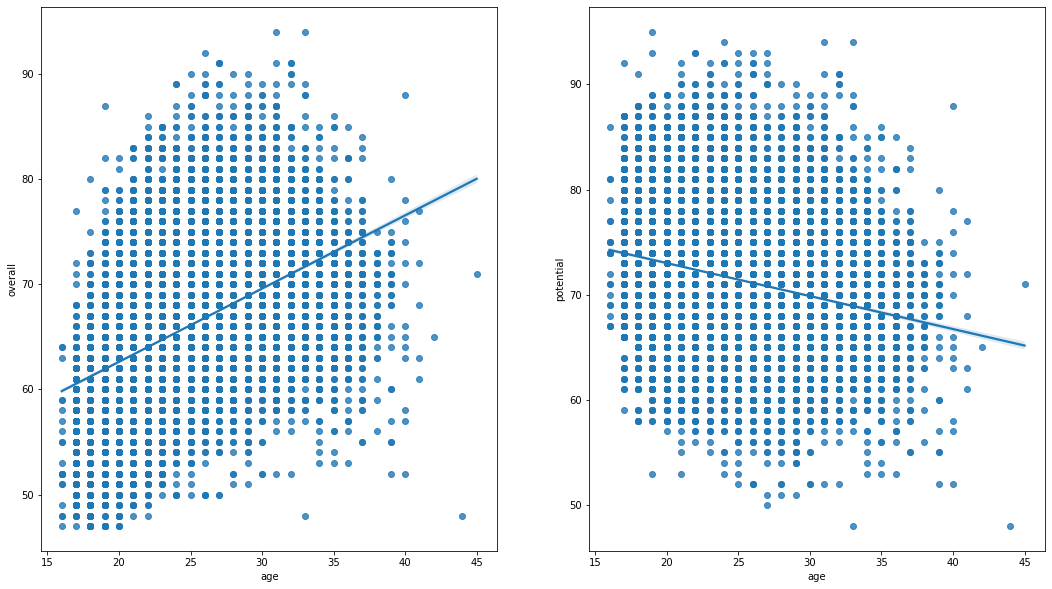

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 10))
sns.regplot(x = game_19['age'], y = game_19['overall'],ax=ax[0])
sns.regplot(x = game_19['age'], y = game_19['potential'], ax=ax[1])

<AxesSubplot:xlabel='age', ylabel='potential'>

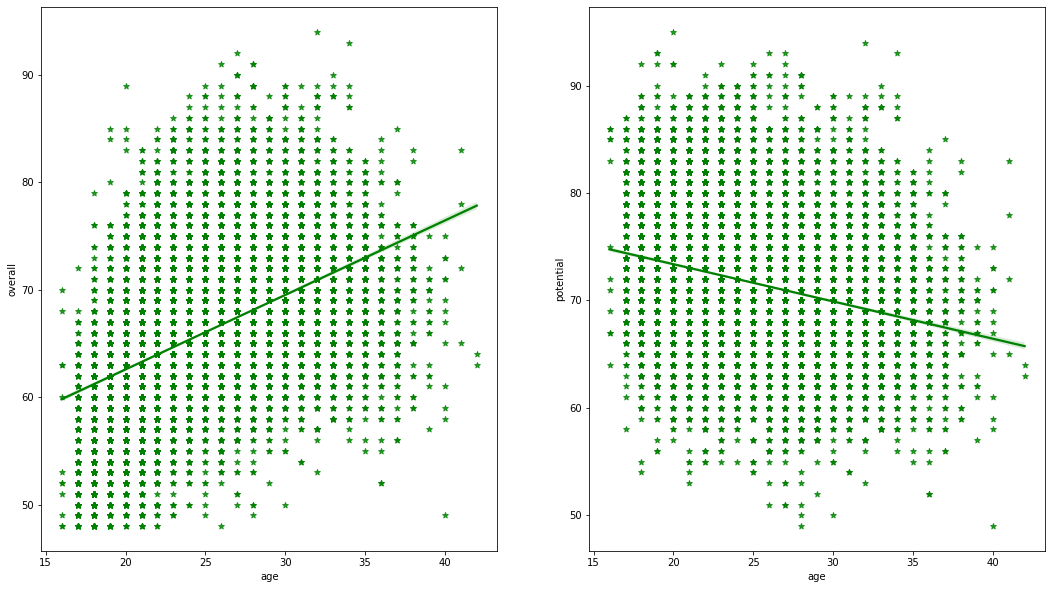

In [62]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 10))
sns.regplot(x = game_20['age'], y = game_20['overall'],ax=ax[0],marker="*",color="g")
sns.regplot(x = game_20['age'], y = game_20['potential'], ax=ax[1],marker="*",color="g")

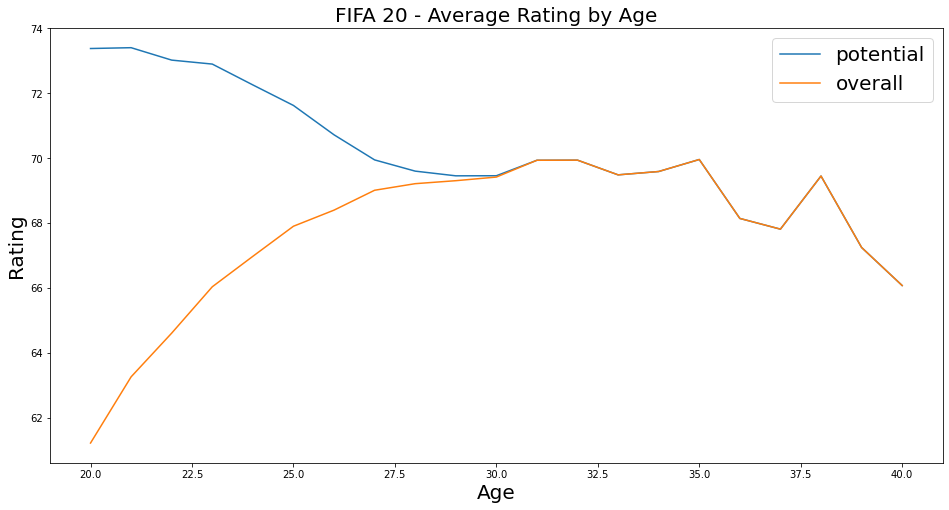

In [71]:
potential = game_20[(game_20.age.astype(int)>=20) & (game_20.age.astype(int)<=40)].groupby(['age'])['potential'].mean()
overall = game_20[(game_20.age.astype(int)>=20) & (game_20.age.astype(int)<=40)].groupby(['age'])['overall'].mean()
summary = pd.concat([potential, overall], axis=1)
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(summary)
ax.legend(("potential","overall"),loc="upper right",fontsize=20)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Rating", fontsize=20)
ax.set_title("FIFA 20 - Average Rating by Age", fontsize=20)
plt.show()

In [128]:
compare_factors=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
comparing=top_attackers_20.head(20)[compare_factors]
comparing=comparing.set_index('short_name')
comparing

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,66.0
Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,78.0
E. Hazard,91,91,91.0,83.0,86.0,94.0,35.0,66.0
M. Salah,90,90,93.0,86.0,81.0,89.0,45.0,74.0
K. Mbappé,89,95,96.0,84.0,78.0,90.0,39.0,75.0
H. Kane,89,91,70.0,91.0,79.0,81.0,47.0,83.0
S. Agüero,89,89,80.0,90.0,77.0,88.0,33.0,74.0
L. Suárez,89,89,73.0,89.0,80.0,84.0,51.0,84.0
R. Lewandowski,89,89,77.0,87.0,74.0,85.0,41.0,82.0


In [158]:
def radar_plot(p1, d1, p2, d2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]
    angles1 = [n/8*2*math.pi for n in range(8)]
    angles1 += angles1[:1]
    angles2 = [n/8*2*math.pi for n in range(8)]
    angles2 += angles2[:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles1[:-1], Attributes)
    ax.plot(angles1, d1)
    ax.fill(angles1, d1, 'teal', alpha=0.1)
    ax.plot(angles2, d2)
    ax.fill(angles2, d2, 'red',  alpha=0.1)
    plt.figtext(0.10, 0.98, p1, color="steelblue")
    plt.figtext(len(p1)/35,0.98, "vs")
    plt.figtext(len(p2)/35+0.05, 0.98,  p2, color="darkorange")
    plt.show()

def compare_players(id1, id2):
    val1 = comparing.iloc[id1].tolist()
    val1 += val1[:1]
    val2 = comparing.iloc[id2].tolist()
    val2 += val2[:1]
    radar_plot(top_attackers_20.head(20)['short_name'][id1], val1,
               top_attackers_20.head(20)['short_name'][id2], val2)


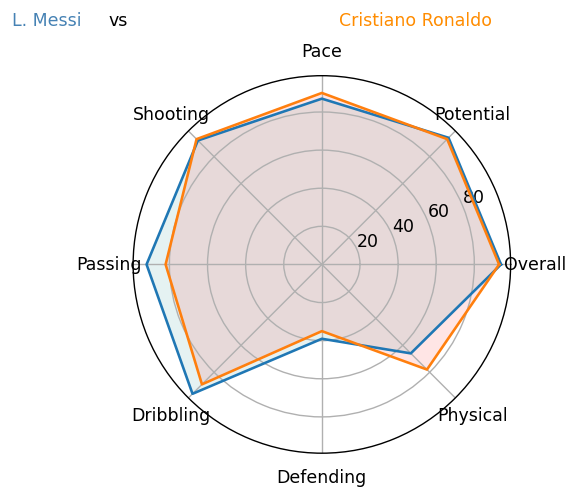

In [159]:
compare_players(0,1)

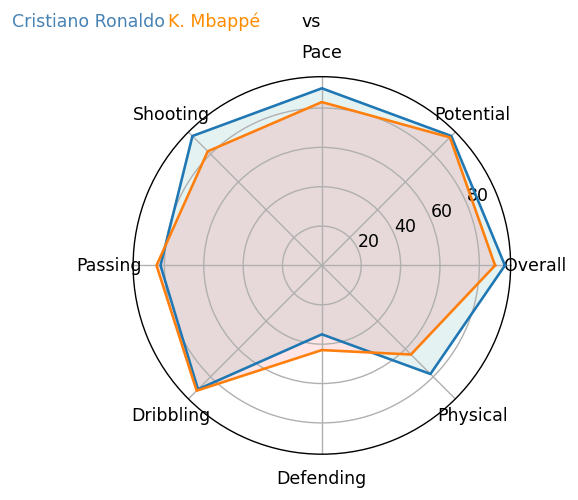

In [163]:
compare_players(1,10)